# Mask R-CNN Surgical Demo

In [7]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np
import cv2

from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    

In [112]:
config_file = "caffe2_surgical.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])
cfg.merge_from_list(["MODEL.WEIGHT", "models/test2/model_032500.pth"])

coco_demo = COCODemo(
    cfg,
    min_image_size=224,
    show_mask_heatmaps=False,
    confidence_threshold=0.000000000000000000,
)

/home/robonaut/data/surgical_tools/coco/coco_train2014/img_000036.jpg


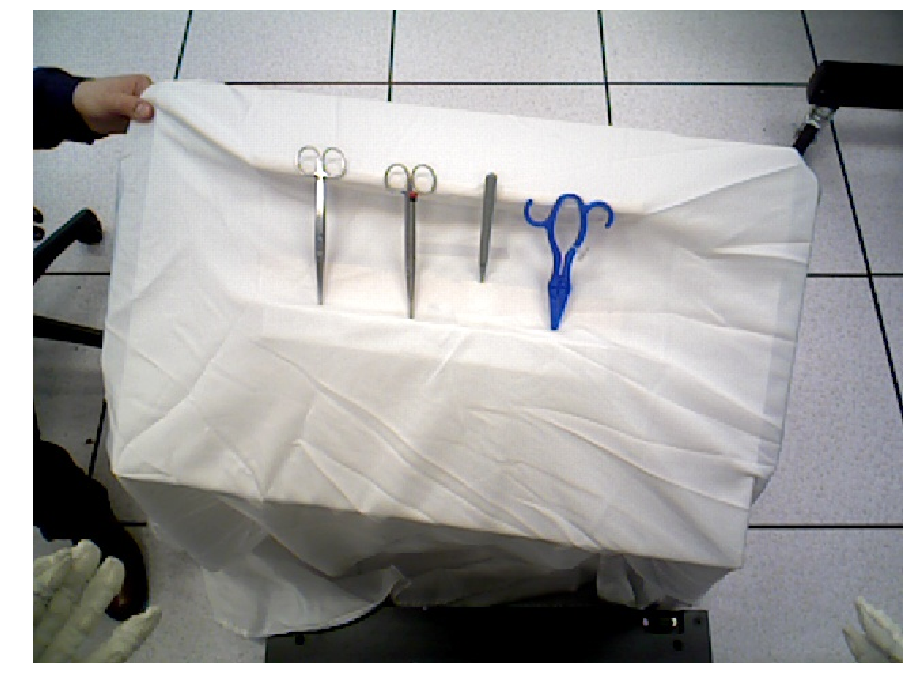

In [118]:
idx = np.random.randint(0,72)
image_filename = "/home/robonaut/data/surgical_tools/coco/coco_train2014/img_{:06d}.jpg".format(idx)
print(image_filename)
image = cv2.imread(image_filename)
#image = cv2.imread("images/train.jpg")
#image = cv2.imread("images/iphone.png")

imshow(image)

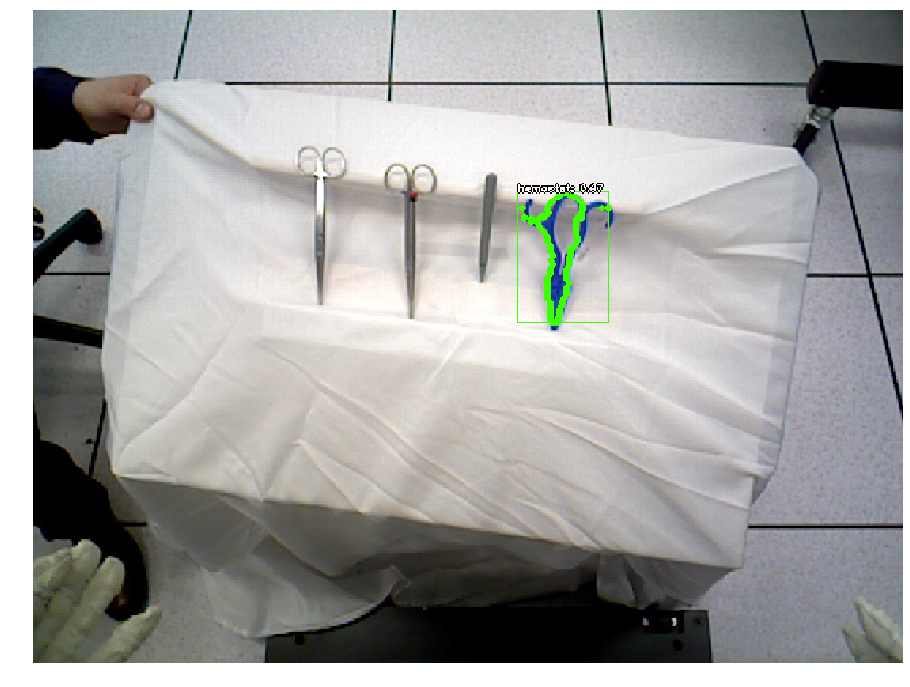

In [120]:
# compute predictions
pred = coco_demo.compute_prediction(image)
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

In [106]:
print(pred.get_field('labels'))
print(pred.get_field('scores'))


tensor([2])
tensor([0.9997])
